# Image Classification Using Deep Learning

This analysis uses the Tensorflow library to classify hand-written digits. The images are saved as 28x28 dimensional grayscale images, where each pixel value ranges from 0 to 255. The digits themselves are single digits ranging from 0 to 9.

The data set was downloaded from the Tensorflow library.

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# download hand-written digit data
mnist = tf.keras.datasets.mnist

# load data into training and test sets
(train_xs, train_ys), (test_xs, test_ys) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [2]:
# verify number of images in training and test set
print('Number of images in training set: ', len(train_xs))
print('Number of images in test set: ', len(test_xs))

Number of images in training set:  60000
Number of images in test set:  10000


In [3]:
# verify the dimensions of an example image
print('Image dimensions: ', train_xs[10].shape)

Image dimensions:  (28, 28)


In [4]:
# verify number of unique digits (categories)
print('Unique categories: ', np.unique(train_ys))

Unique categories:  [0 1 2 3 4 5 6 7 8 9]


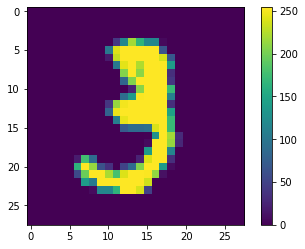

In [5]:
# display an example image with a color bar
plt.imshow(train_xs[10])
plt.colorbar()

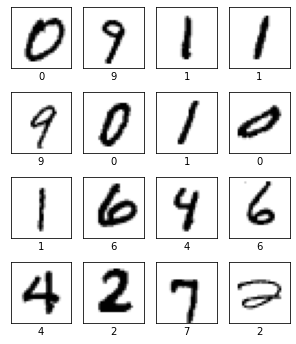

In [10]:
# initialize figure
fig = plt.figure(figsize=(5, 6))

# display 16 random digits from the data set
for i in range(16):

  # set grid size and grid location for each image
  plt.subplot(4, 4, i + 1)

  # generate a random number up to the number of observations in the training set
  random_num = int(np.random.randint(0, 60000, size=1))

  # display observation based on random number
  plt.imshow(train_xs[random_num], cmap=plt.cm.binary)

  # label each image with its respective label
  plt.xlabel(train_ys[random_num])

  # remove axis ticks
  plt.xticks([])
  plt.yticks([])

## Uploaded Digits

To further test the deep learning model, I have created my own hand-written digits, and uploaded the .png files to this analysis.

In [15]:
import matplotlib.image as mpimg

# initialize emtpy list with 10 elements for my hand-written digits
mydigits_files = [None] * 10

# initialize matrix to store 10 28x28 images
mydigits = np.empty((10, 28, 28))

# function to convert rgb images to grayscale
def rgb2gray(rgb):
  return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

# convert images into arrays
for num in range(10):
  mydigits_files[num] = str(num) + '.png'
  mydigits[num] = 1 - rgb2gray(mpimg.imread(mydigits_files[num]))

# create a list for the true digit labels
mydigits_labels = [digit for digit in range(10)]

# verify the image files and labels
print('Image files: ', mydigits_files)
print('Digit labels: ', mydigits_labels)

Image files:  ['0.png', '1.png', '2.png', '3.png', '4.png', '5.png', '6.png', '7.png', '8.png', '9.png']
Digit labels:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


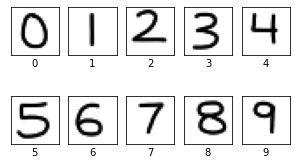

In [17]:
# initialize new figure
fig = plt.figure(figsize=(5, 3))

# display my 10 hand-written digits
for i in range(10):

  # set grid size and grid location for each image
  plt.subplot(2, 5, i + 1)

  # display respective digit
  plt.imshow(mydigits[i], cmap='gray_r')

  # label each image with its respective label
  plt.xlabel(mydigits_labels[i])

  # remove axis ticks
  plt.xticks([])
  plt.yticks([])

## Data Pre-Processing

Before training the neural network, the data is normalized, so that each value ranges from 0 to 1. This is done by dividing each entry by the maximum entry in the data set (255).

In [20]:
# verify the range of values per entry in image files
print('Minimum value: ', np.min(train_xs))
print('Maximum value: ', np.max(train_xs))

# normalize the values between 0 and 1
# by dividing by the maximum value 255
train_xs = train_xs / 255
test_xs = test_xs / 255

Minimum value:  0
Maximum value:  255


## Neural Network Properties

The Tensorflow library is used to create neural networks. For this project, a 2-layer neural network is used, with the input layer flattening the 2d images into a single vector. The hidden layer contains 28 neurons, and uses ReLu as an activation function, while the output layer consists of 10 nodes (one for each possible single digit), with softmax as the activation function.

In [22]:
# initialize neural network
neural_net = tf.keras.models.Sequential([
    
    # input layer to flatten 2d image files into a single vector
    tf.keras.layers.Flatten(),

    # hidden layer with 128 nodes and ReLu as activation function
    tf.keras.layers.Dense(128, activation=tf.nn.relu),

    # output layer with 10 classes and softmax as activation function
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

## Model Training

The model will be trained using the Adam optimization algorithm. The sparse categorical cross-entropy is chosen as the loss function since the model is a classifier with more than 2 classes. The accuracy metric will be used to evaluate the model

The model is trained using 10 epoch iterations of forward-feeding and backpropagation.

In [24]:
# set optimizer, loss function, and validation metric
# sparse categorical cross entropy selected due to classifier model with > 2 classes
neural_net.compile(
    optimizer=tf.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# train the model with 10 epoch iterations
neural_net.fit(train_xs, train_ys, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2595 - accuracy: 0.9265
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1138 - accuracy: 0.9663
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0788 - accuracy: 0.9759
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0590 - accuracy: 0.9823
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0464 - accuracy: 0.9858
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0356 - accuracy: 0.9890
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0287 - accuracy: 0.9908
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0231 - accuracy: 0.9924
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0181 - accuracy: 0.9946
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.018

In [25]:
# validate the model on the test data set
neural_net.evaluate(test_xs, test_ys)

313/313 [==============================] - 1s 1ms/step - loss: 0.0881 - accuracy: 0.9769


[0.08812378346920013, 0.9768999814987183]

## Model Evaluation

Training data set accuracy: 99.43%
Test data set accuracy: 97.69%

The model performed slightly better on the training data set, but still very accurate on the test data set.

In [28]:
# generate predictions for my hand-written digits
mydigit_predict = neural_net.predict(mydigits)

# print the prediction as the highest class probability
for p in range(10):
  true_digit = mydigits_labels[p]
  predicted_digit = np.argmax(mydigit_predict[p])

  print('\nTrue digit: ', true_digit)
  print('Predicted digit: ', predicted_digit)


True digit:  0
Predicted digit:  0

True digit:  1
Predicted digit:  1

True digit:  2
Predicted digit:  2

True digit:  3
Predicted digit:  3

True digit:  4
Predicted digit:  4

True digit:  5
Predicted digit:  3

True digit:  6
Predicted digit:  5

True digit:  7
Predicted digit:  7

True digit:  8
Predicted digit:  8

True digit:  9
Predicted digit:  3


## Performance on My Digits

The model correctly predicted 7 out of 10 of my hand-written digits. The 5, 6, and 9 were misclassified. Some next steps would be for me to generate more hand-written digits to understand if the performance of the model would improve with a greater sample size.